# Project description

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.

Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.


## Initialization

### Write a code to parse the data on weather in Chicago in November 2017 from the website: https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import bokeh
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Envoyez une requête HTTP et obtenez le contenu HTML 

Utilisez la bibliothèque 'request' pour envoyer une requête GET à l'URL et obtenir le contenu HTML

In [5]:
# Envoyer une requête HTTP à l'URL
url = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(url)

In [6]:
soup = BeautifulSoup(req.text, 'lxml')

# Trouver le tableau dans le HTML
table = soup.find('table', attrs={"id": "weather_records"})

# Analyser l'en-tête du tableau
headers = [header.text for header in table.find_all('th')]

# Analyser les lignes du tableau
rows = []
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        rows.append([cell.text for cell in cells])

# Créer un DataFrame
weather_records = pd.DataFrame(rows, columns=headers)

# Imprimer le DataFrame
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


## Analyse exploratoire des données dans SQL

### Imprimez le champ company_name. Recherchez le nombre de courses en taxi pour chaque compagnie de taxi pour les 15 et 16 novembre 2017, nommez le montant des déplacements sur le terrain résultant et imprimez-le également. Triez les résultats par champ trips_amount par ordre décroissant.

In [7]:
SELECT
    cabs.company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM 
    cabs
    INNER JOIN 
    trips 
    ON 
    trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-15' AND '2017-11-16'
GROUP BY 
    company_name
ORDER BY 
    trips_amount DESC;

IndentationError: unexpected indent (1833501797.py, line 2)

### Recherchez le nombre de courses pour chaque compagnie de taxi dont le nom contient les mots « Jaune » ou « Bleu » pour la période du 1er au 7 novembre 2017. Nommez la variable résultante trips_amount. Regroupez les résultats par champ company_name.

In [ ]:
SELECT
    cabs.company_name as company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM 
    cabs
INNER JOIN 
    trips 
ON 
    trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
    AND cabs.company_name LIKE '%%Yellow%%'
GROUP BY company_name
UNION ALL
SELECT
    cabs.company_name as company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM 
    cabs
INNER JOIN 
    trips 
ON 
    trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
    AND cabs.company_name LIKE '%%Blue%%'
GROUP BY company_name;

### Du 1er au 7 novembre 2017, les compagnies de taxi les plus populaires étaient Flash Cab et Taxi Affiliation Services. Recherchez le nombre de trajets pour ces deux entreprises et nommez la variable résultante trips_amount. Rejoignez les manèges de toutes les autres entreprises du groupe «Autre». Regroupez les données par nom de compagnie de taxi. Nommez le champ avec les noms des compagnies de taxi company. Triez le résultat par ordre décroissant par trips_amount.

In [ ]:
SELECT
    CASE 
        WHEN company_name = 'Flash Cab' THEN 'Flash Cab' 
        WHEN company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services' 
        ELSE 'Other' 
    END AS company,
    COUNT(trips.trip_id) as trips_amount                
FROM 
    cabs
INNER JOIN 
    trips 
ON 
    trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
GROUP BY 
    company
ORDER BY 
    trips_amount DESC;

## Testez l'hypothèse dans SQL

Testez l'hypothèse selon laquelle la durée des trajets entre le Loop et l'aéroport international O'Hare change les samedis pluvieux.

### Récupérez les identifiants des quartiers O'Hare et Loop dans la table des quartiers.

In [ ]:
SELECT
    neighborhood_id,
    name
FROM 
    neighborhoods
WHERE 
    name LIKE '%Hare' OR name LIKE 'Loop'

### Pour chaque heure, récupérez les enregistrements de conditions météorologiques de la table Weather_records. À l'aide de l'opérateur CASE, divisez toutes les heures en deux groupes : « Mauvais » si le champ de description contient les mots « pluie » ou « tempête » et « Bon » pour les autres. Nommez le champ résultant Weather_conditions. Le tableau final doit comprendre deux champs : date et heure (ts) et Weather_conditions.

In [ ]:
SELECT
    ts,
    CASE
        WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions
FROM 
    weather_records;

### Récupérez dans la table des trajets tous les trajets qui ont commencé dans la boucle (neighborhood_id : 50) et se sont terminés à O'Hare (neighborhood_id : 63) un samedi. Obtenez les conditions météorologiques pour chaque trajet. Utilisez la méthode que vous avez appliquée dans la tâche précédente. Récupérez également la durée de chaque trajet. Ignorez les trajets pour lesquels les données sur les conditions météorologiques ne sont pas disponibles.

In [ ]:
SELECT
    start_ts,
    T.weather_conditions,
    duration_seconds
FROM 
    trips
INNER JOIN (
    SELECT
        ts,
        CASE
            WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
            ELSE 'Good'
        END AS weather_conditions
    FROM 
        weather_records          
) T on T.ts = trips.start_ts
WHERE 
    pickup_location_id = 50 AND dropoff_location_id = 63 AND EXTRACT (DOW from trips.start_ts) = 6
ORDER BY trip_id

## Analyse exploratoire des données dans Python

En plus des données que vous avez récupérées lors des tâches précédentes, vous disposez d'un deuxième fichier. Vous avez maintenant ces deux CSV :

     •	/datasets/project_sql_result_01.csv. It contains the following data:
          o	company_name: taxi company name
          o	trips_amount: the number of rides for each taxi company on November 15-16, 2017.

     •	/datasets/project_sql_result_04.csv. It contains the following data:
          o	dropoff_location_name: Chicago neighborhoods where rides ended
          o	average_trips: the average number of rides that ended in each neighborhood in November 2017.


### Importer les fichiers

In [9]:
try:
    url_trips = 'https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv'
    df_trips = pd.read_csv(url_trips)

    # URL 2: Ohare Loop
    url_ohare_loop = 'https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv'
    df_ohare_loop = pd.read_csv(url_ohare_loop)

    # URL 3: Dropoff
    url_dropoff = 'https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv'
    df_dropoff = pd.read_csv(url_dropoff)
    
except FileNotFoundError:
    print("One or more CSV files not found. Please check file paths.")

Commentaire : Ici, j'ai décidé d'écrire une fonction qui produit un message d'erreur pour deux raisons. J'ai amélioré mon contrôle qualité avant le traitement, mais il semble toujours y avoir quelques problèmes en aval. Je travaillais également dans VSCode, j'ai donc dû télécharger les fichiers sur cet environnement cloud pour les lire dans les trames de données.

### Étudier les données qu’ils contiennent

In [ ]:
# Vérifiez la structure des données de la manière la plus rapide
df_trips.info()
df_dropoff.info()
df_ohare_loop.info()

Commentaire : C'est ma façon d'extraire les informations nécessaires pour configurer mon schéma, mes flux de travail et autres diagrammes, ainsi que pour anticiper les longueurs de df incongrues. Cela m'aide également à suivre les transformations de type et les modifications du dataframe.

In [10]:
# Renommez la colonne "average_trips" en "number_of_trips"
df_ohare_loop = df_ohare_loop.rename(columns={'average_trips': 'number_of_trips'})

Commentaire : J'ai décidé de changer le nom des trajets moyens car la mesure n'avait pas de sens sur une période de deux jours. Cela ressemblait plus à un décompte dans le csv d'origine.

In [11]:
# Contrôle d'assurance qualité (AQ) pour identifier toute irrégularité dans les ensembles de données

def check_values(df):
    print(f"Checking {df.shape[0]} rows and {df.shape[1]} columns in DataFrame...")
    
    # compter les zéros
    zero_count = (df == 0).sum().sum()
    print(f"Zeros found: {zero_count}")
    
    # compter null/nan et inf/-inf
    df_inf = df.replace([np.inf, -np.inf], np.nan)
    nan_count = df_inf.isnull().sum().sum()
    print(f"Null/NaN values found: {nan_count}")

check_values(df_trips)
check_values(df_dropoff)
check_values(df_ohare_loop)

Checking 64 rows and 2 columns in DataFrame...
Zeros found: 0
Null/NaN values found: 0
Checking 1068 rows and 3 columns in DataFrame...
Zeros found: 6
Null/NaN values found: 0
Checking 94 rows and 2 columns in DataFrame...
Zeros found: 0
Null/NaN values found: 0


Commentaire : J'ai ajouté ici une étape d'assurance qualité pour anticiper les irrégularités les plus courantes dans les trames de données ou les listes/colonnes. Inf/-inf était difficile à détecter au début, mais est entré en jeu dans la mission des jeux vidéo. Je n'ai toujours pas trouvé la raison pour laquelle ceux-ci apparaissent.

In [38]:
# Supprimez les lignes où des zéros ont été trouvés pour éviter tout problème de traitement en aval
df_dropoff = df_dropoff[(df_dropoff != 0).all(axis=1)]

Commentaire : Ici, j'ai décidé de supprimer les lignes avec des 0 car elles représentent environ 0,5 % des données que je considère comme faibles dans ce cas.

In [13]:
# Divisez la colonne « start_ts » en colonnes « date » et « heure »
df_dropoff[['date', 'time']] = df_dropoff['start_ts'].str.split(' ', expand=True)

# Vous avez maintenant votre DataFrame avec des colonnes « date » et « heure » distinctes.
print(df_dropoff.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1062 non-null   object 
 1   weather_conditions  1062 non-null   object 
 2   duration_seconds    1062 non-null   float64
 3   date                1062 non-null   object 
 4   time                1062 non-null   object 
dtypes: float64(1), object(4)
memory usage: 49.8+ KB
None


Commentaire : Ici, je divise la trame de données ['start_ts'] en colonnes supplémentaires distinctes en prévision de la stratification des données par heure de la journée ['time'] ou peut-être par jour du mois ['date'].

### Assurez-vous que les types de données sont corrects

In [43]:
# Convertir la colonne 'start_ts' au format datetime
df_dropoff['start_ts'] = pd.to_datetime(df_dropoff['start_ts'])

# Extrayez le jour de la colonne 'start_ts'
df_dropoff['day'] = df_dropoff['start_ts'].dt.day

print(df_dropoff.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1067
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1062 non-null   datetime64[ns]
 1   weather_conditions  1062 non-null   object        
 2   duration_seconds    1062 non-null   float64       
 3   date                1062 non-null   datetime64[ns]
 4   time                1062 non-null   datetime64[ns]
 5   day                 1062 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(1), object(1)
memory usage: 58.1+ KB
None


Commentaire : Confirmer que le type de données pour ['date'] est converti en une valeur de type int et attribuer un int 0 à 6 à ['day']

In [39]:
# Convertir la colonne 'date' au format datetime
df_dropoff['date'] = pd.to_datetime(df_dropoff['date'])

df_dropoff.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
date                  datetime64[ns]
time                  datetime64[ns]
day                            int64
dtype: object

In [40]:
# supposons que df_trips est votre dataframe et 'company_name' est la colonne avec les caractères indésirables

df_trips['company_name'] = df_trips['company_name'].str.replace(r'\d{4} - \d{5}', '', regex=True)

### Identifiez les 10 premiers quartiers en termes de décrochages

In [42]:
# En supposant que df_ohare_loop soit votre DataFrame
df_ohare_loop = df_ohare_loop.sort_values(by='number_of_trips', ascending=False)

#Maintenant, df_ohare_loop est trié par la colonne 'average_trips' par ordre décroissant
print("Les destinations les plus populaires des courses en taxi à Chicago en novembre 2017 étaient :")
display(df_ohare_loop.head(10))

Les destinations les plus populaires des courses en taxi à Chicago en novembre 2017 étaient :


,dropoff_location_name,number_of_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Faites des graphiques : compagnies de taxi et nombre de trajets, top 10 des quartiers par nombre de déposes

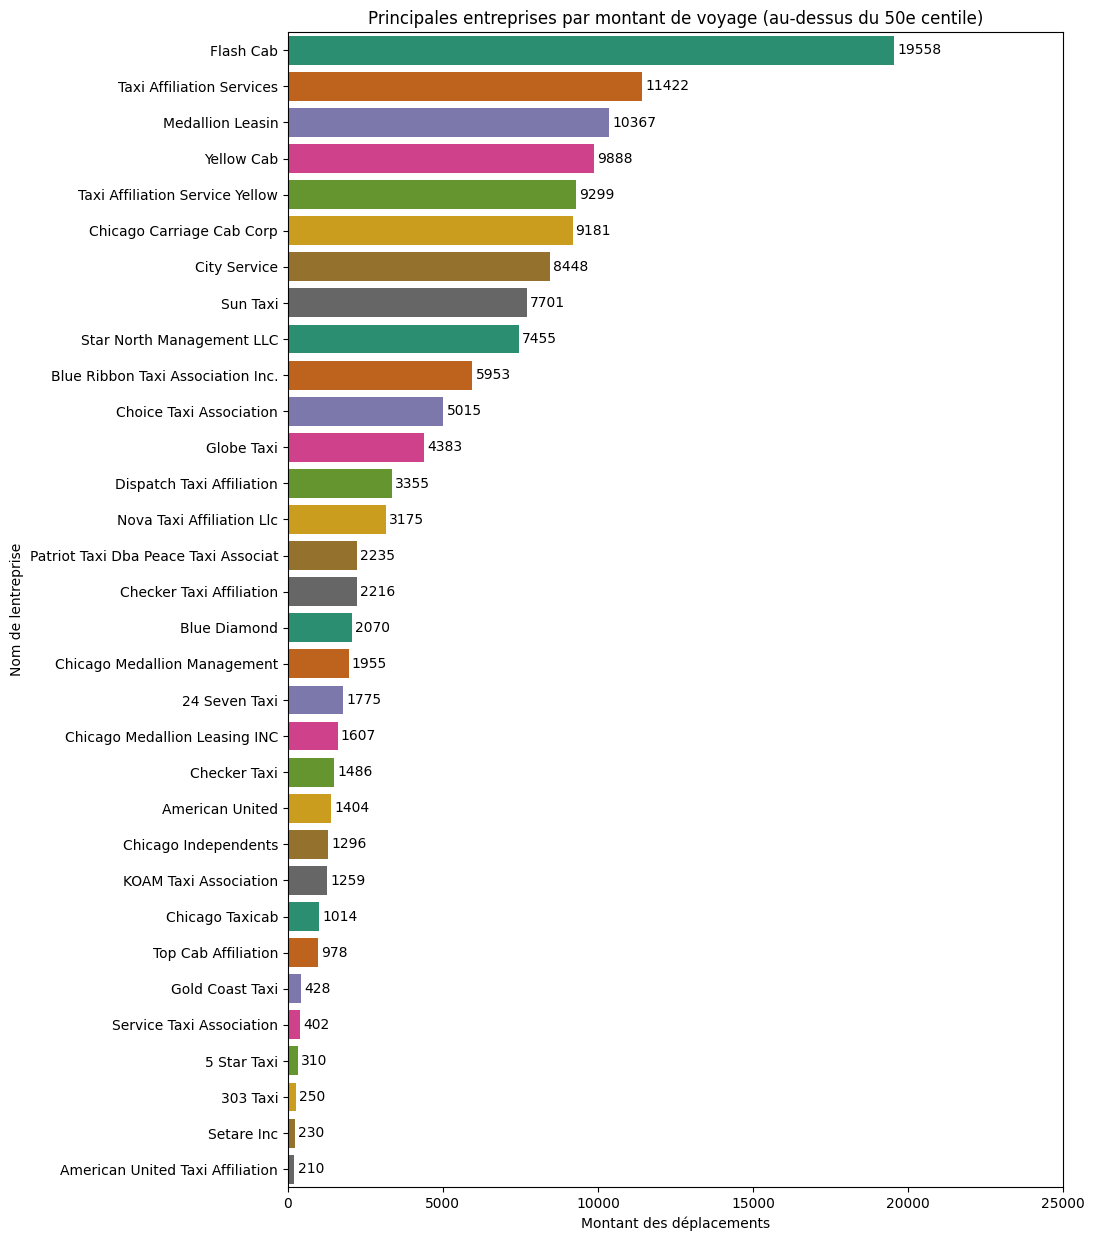

In [44]:
# Compagnies de taxi première visualisation (Horizontal Bar Chart using ['company_name'] and sum of ['trips_amount'] )

# Calculer le 50e centile de trips_amount
trips_amount_50th_percentile = np.percentile(df_trips['trips_amount'], 50)

# Filtrez la base de données pour inclure uniquement les entreprises dont le montant de trips est supérieur au 50e centile.
df_trips_filtered = df_trips[df_trips['trips_amount'] > trips_amount_50th_percentile]

# Trier la trame de données par « trips_amount » par ordre décroissant
df_trips_sorted = df_trips_filtered.groupby('company_name')['trips_amount'].sum().reset_index().sort_values('trips_amount', ascending=False)

# Créez le graphique à barres horizontales à l'aide de seaborn
plt.figure(figsize=(10, 15))  # Allonger le cadre
sns.barplot(x='trips_amount', y='company_name', data=df_trips_sorted, palette="Dark2")
plt.xlabel('Montant des déplacements')
plt.ylabel('Nom de lentreprise')
plt.title('Principales entreprises par montant de voyage (au-dessus du 50e centile)')

# Définissez la limite de l'axe X sur 25 000
plt.xlim(0, 25000)

# Ajouter des étiquettes de données
for i, (company, trips) in enumerate(zip(df_trips_sorted['company_name'], df_trips_sorted['trips_amount'])):
    plt.text(trips + 100, i, f'{trips:.0f}', ha='left', va='center')

plt.show()

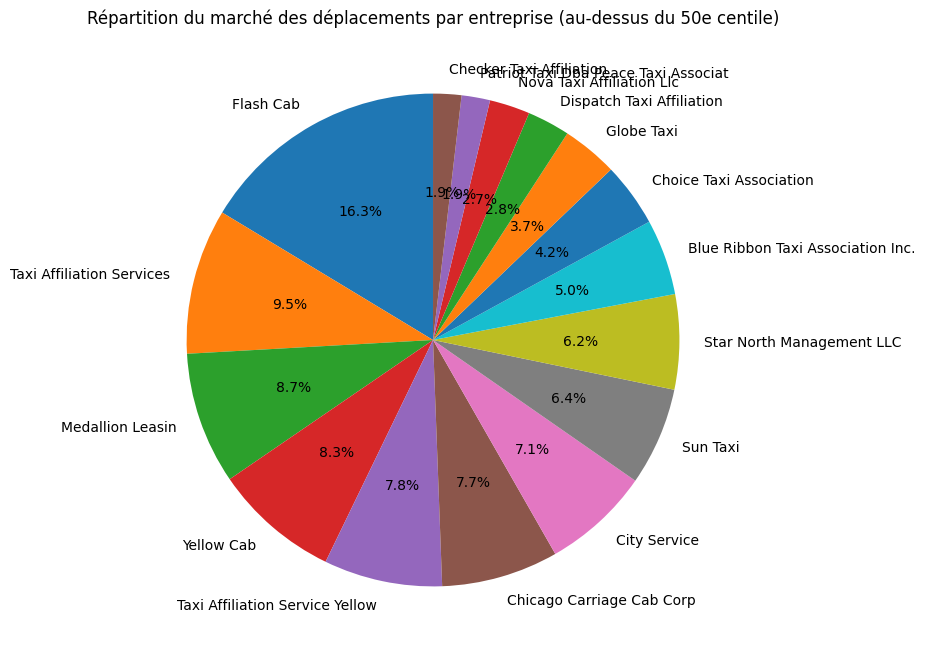

In [46]:
import matplotlib.pyplot as plt

# Calculer le 50e centile de trips_amount
trips_amount_75th_percentile = np.percentile(df_trips['trips_amount'], 75)

# Filtrez la base de données pour inclure uniquement les entreprises dont le montant de trips est supérieur au 50e centile.
df_trips_filtered2 = df_trips[df_trips['trips_amount'] > trips_amount_75th_percentile]

# Trier la trame de données par « trips_amount » par ordre décroissant
df_trips_sorted2 = df_trips_filtered2.groupby('company_name')['trips_amount'].sum().reset_index().sort_values('trips_amount', ascending=False)

# Créez le graphique à secteurs (pie chart)
plt.figure(figsize=(10, 8))  # Allonger le cadre
plt.pie(df_trips_sorted2['trips_amount'], labels=df_trips_sorted2['company_name'], autopct='%1.1f%%', startangle=90)
plt.title('Répartition du marché des déplacements par entreprise (au-dessus du 50e centile)')

plt.show()

Commentaire : J'ai d'abord tracé l'ensemble de données sur le barplot, puis j'ai dû réduire l'ensemble de données, j'ai donc opté pour 50 % pour obtenir une belle distribution. Il y avait aussi de nombreuses entreprises < 50 voyages, donc c'était incroyablement difficile à lire et cela serait revu plus tard avec des diagrammes en boîte. J'ai ensuite ajouté un diagramme circulaire pour une visualisation de type part de marché des 20 % des entreprises les plus performantes en termes de trajet, ce qui ajoute une meilleure dimension aux valeurs brutes dans le graphique à barres.

Insight : Ainsi, nous constatons que les 6 ou 7 premières entreprises prennent 50 % de la part des trajets pendant la période de deux jours. Flash Cab est un leader avec une part beaucoup plus importante de trajets, suivi par Taxi Affiliation Services et Medallion Leasin. Les trois sociétés suivantes sont fondamentalement liées. Nous pouvons également reconnaître qu'il existe un grand nombre d'entreprises sur le marché local.

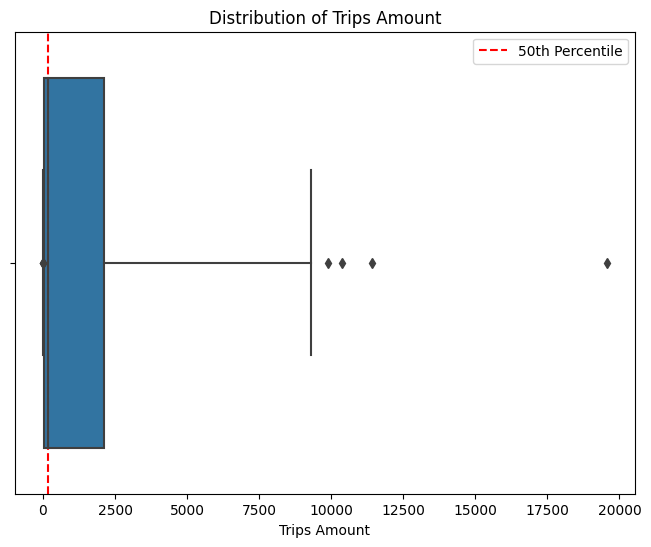

In [47]:
# Create a boxplot of the full dataset
plt.figure(figsize=(8, 6))
sns.boxplot(x='trips_amount', data=df_trips, whis=[5, 95])
plt.title('Distribution of Trips Amount')
plt.xlabel('Trips Amount')
plt.ylabel('')

# Add a horizontal line at the 50th percentile
trips_amount_50th_percentile = np.percentile(df_trips['trips_amount'], 50)
plt.axvline(trips_amount_50th_percentile, color='r', linestyle='--', label='50th Percentile')

plt.legend()
plt.show()

Commentaire : J'ai commencé par l'analyse statistique en visualisant d'abord les données. J'ai été attiré vers cette visualisation parce que j'ai remarqué qu'une grande partie des entreprises se situent à l'extrémité inférieure de la métrique trips_amount.

Aperçu : Comme nous pouvons le constater, les leaders du marché sont des valeurs aberrantes et le concept de part de marché n'est pas bien saisi en raison du poids important des entreprises situées en dessous du 75e percentile. Aucune autre idée ici – principalement exploratoire.

In [48]:
print(tabulate.tabulate([df_trips['trips_amount'].describe().values], 
                         headers=df_trips['trips_amount'].describe().index, 
                         tablefmt='psql'))

+---------+---------+---------+-------+-------+-------+--------+-------+
|   count |    mean |     std |   min |   25% |   50% |    75% |   max |
|---------+---------+---------+-------+-------+-------+--------+-------|
|      64 | 2145.48 | 3812.31 |     2 | 20.75 | 178.5 | 2106.5 | 19558 |
+---------+---------+---------+-------+-------+-------+--------+-------+


Commentaire : Ajout d'un modèle de statistiques descriptives. J'ai trouvé un package appelé tabulate qui est ok. Je l'aime encore mieux que la sortie non structurée.

Perspectives : décrites dans le tableau.

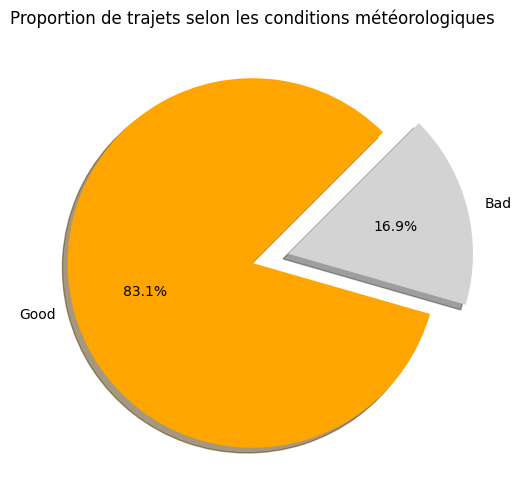

In [50]:
# Nombre de trajets première visualisation (Pie Chart of proportion of rides by weather_condtion through a count of ['weather_conditions'])
# Assuming your dataframe is named df_trips

# Count the number of rides by weather condition
weather_counts = df_dropoff['weather_conditions'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', colors=['orange', 'lightgrey'], explode=[0., 0.2], shadow = True, startangle=45)
plt.title('Proportion de trajets selon les conditions météorologiques')
plt.show()

In [51]:
from bokeh.models import ColumnDataSource, Whisker, Span
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, jitter
from bokeh.io import output_notebook

output_notebook()

classes = list(sorted(df_dropoff["weather_conditions"].unique()))

p = figure(height=400, x_range=classes, background_fill_color="#efefef",
           title="Weather Condition vs Trip Duration with quantile ranges")
p.xgrid.grid_line_color = None

g = df_dropoff.groupby("weather_conditions")
upper = g.duration_seconds.quantile(0.75)
lower = g.duration_seconds.quantile(0.25)
median = g.duration_seconds.quantile(0.5)
min_val = df_dropoff.duration_seconds.quantile(1.0)
max_val = df_dropoff.duration_seconds.quantile(0.0)
median_val = df_dropoff.duration_seconds.median()

source = ColumnDataSource(data=dict(base=classes, upper=upper, lower=lower, median=median))

error = Whisker(base="base", upper="upper", lower="lower", source=source,
                level="annotation", line_width=2)
error.upper_head.size=20
error.lower_head.size=20
p.add_layout(error)

# Add indicators for 0%, 50%, and 100%
min_indicator = Span(location=min_val, dimension='width', line_color='red', line_width=2)
p.add_layout(min_indicator)

median_indicator = Span(location=median_val, dimension='width', line_color='green', line_width=2)
p.add_layout(median_indicator)

max_indicator = Span(location=max_val, dimension='width', line_color='blue', line_width=2)
p.add_layout(max_indicator)

p.scatter(jitter("weather_conditions", 0.3, range=p.x_range), "duration_seconds", source=df_dropoff,
          alpha=0.5, size=13, line_color="white",
          color=factor_cmap("weather_conditions", "Light7", classes))

show(p)

Loading BokehJS ...

Commentaire : J'avais besoin d'un ensemble de visualisations plus puissants pour l'analyse des dimensions et des attributs. J'en ai donc identifié quelques-unes sur lesquelles je vais travailler. J'ai encore besoin d'aide pour déployer le bokeh (éventuellement alto) dans Render si vous avez de l'aide, faites-le-moi savoir. J'apprécierais que ces applications restent un peu secrètes, car elles constituent un avantage concurrentiel pour nous, les demandeurs d'emploi. Je dois également revenir en arrière et créer le tableau de bord de formation du modèle en version simplifiée qui a été présenté plus tôt. Je développe une application de prévisions.
    
Insight : Nous constatons qu'à première vue, il n'y a pas de différence visuellement identifiable dans la durée du trajet en secondes les jours où le temps était soit pluvieux ("mauvais"), soit beau ("bon").

In [54]:
# Compagnies de taxi visualisation deux (Bokeh scatter with markers = ['weather_conditions'], x = ['duration_seconds'], y = ['time'])
#https://docs.bokeh.org/en/latest/docs/examples/basic/data/transform_markers.html

from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, factor_mark
from bokeh.transform import factor_cmap, jitter
from bokeh.io import output_notebook

output_notebook()

# Créez des groupes de légendes, des marqueurs et des mappages de couleurs en fonction de conditions météorologiques uniques
SPECIES = df_dropoff['weather_conditions'].unique()  # Obtenez des conditions météorologiques uniques
MARKERS = ['hex', 'circle_x'] * (len(SPECIES) // 2 + 1)  # Attribuer des marqueurs de manière cyclique

p = figure(title="Weather Conditions", background_fill_color="#fafafa")
p.xaxis.axis_label = 'Duration (seconds)'
p.yaxis.axis_label = 'Start Time'

p.scatter(x="duration_seconds", y="time", source=df_dropoff,
          legend_group="weather_conditions", fill_alpha=0.3, size=4,
          marker=factor_mark('weather_conditions', MARKERS, SPECIES),
          color=factor_cmap('weather_conditions', 'Category10_3', SPECIES))

p.legend.location = "top_left"
p.legend.title = "Weather Conditions"

show(p)

Loading BokehJS ...

Commentaire : Je m'oriente ici vers l'analyse en composantes principales (ACP) en demandant si une différence peut être observée dans deux séries de données en supposant que la durée des trajets est une variable indépendante (quelqu'un avait besoin d'aller quelque part ce jour-là) versus le temps que ils ont choisi de partir ou de fixer ce rendez-vous.

Aperçu : Trois observations intéressantes sont les suivantes : (1) les données sont correctes, positivement asymétriques, (2) il existe une indication visuelle selon laquelle à mesure que la durée des trajets s'allonge, les heures de départ sont plus tard dans la journée (ligne de pente positive), et (3) les trajets les mauvais jours semblent avoir une heure de départ plus tardive.

In [58]:
# Top 10 quartiers par nombre de desposes première visualisation 
# Trier le DataFrame par « average_trips » par ordre décroissant

# Convertir 'average_trips' en entier (en supposant qu'il s'agisse d'un flottant)
top_10_df = df_ohare_loop.copy()  # Créer une copie (facultatif)
top_10_df['number_of_trips'] = top_10_df['number_of_trips'].astype(int)

# Obtenez les 10 premières lignes (quartiers)
top_10_df = top_10_df.sort_values(by='number_of_trips', ascending=False).head(10)

display(top_10_df)
df_ohare_loop.describe()

,dropoff_location_name,number_of_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


,number_of_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


### Tirer des conclusions sur la base de chaque graphique et expliquer les résultats

Insights : l’analyse cherche à extraire des informations d’ensembles de données qui ne sont pas si liés après tout. Pour ecample, nous obtenons des valeurs triées et des statistiques descriptives pour les différentes métriques mais les ensembles de données répondent à des questions très différentes. Par exemple, la durée des trajets et l'heure de départ reflètent le comportement du consommateur, les leaders du marché sont utiles pour cette perspective de marché et une perspective lointaine de consommation. Enfin, la partie destination est utile pour déterminer les types d'utilisateurs, mais elle est encore difficile à caractériser, surtout dans les zones urbaines.

## Testez l'hypothèse dans Python

     •	/datasets/project_sql_result_07.csv — le résultat de la dernière requête. Il contient des données sur les trajets du Loop à l'aéroport international O'Hare. N'oubliez pas que voici les valeurs des champs de la table :

          o	start_ts
          o	pickup date and time
          o	weather_conditions
          o	weather conditions at the moment the ride started
          o	duration_seconds
          o	ride duration in seconds


### Testez l'hypothèse :

Nulle: La durée moyenne des trajets depuis le Loop jusqu'à l'aéroport international O'Hare change les samedis pluvieux.

Alternative: La durée moyenne des trajets depuis le Loop jusqu'à l'aéroport international O'Hare ne change les samedis pluvieux.

Et le test d'hypotheses que nous devrions utiliser est: test t de proportion pour un enchantillon

In [24]:
from scipy.stats import ttest_ind

# Ajouter une colonne jour de la semaine
df_dropoff['day_of_week'] = df_dropoff['date'].dt.dayofweek

# Créer une colonne binaire indiquant si c'est un samedi
df_dropoff['is_saturday'] = df_dropoff['day_of_week'] == 5

# Créez une colonne binaire indiquant si la météo est « Mauvaise » (1) ou « Bonne » (0)
df_dropoff['bad_weather'] = np.where(df_dropoff['weather_conditions'] == 'Bad', 1, 0)

# Divisez les données en samedis pluvieux et autres jours
rainy_saturdays = df_dropoff[(df_dropoff['is_saturday'] == True) & (df_dropoff['bad_weather'] == 1)]['duration_seconds']
other_days = df_dropoff[(df_dropoff['is_saturday'] != True) | (df_dropoff['bad_weather'] == 0)]['duration_seconds']

print(rainy_saturdays.shape, other_days.shape)

(180,) (882,)


In [25]:
# Effectuer un test t sur deux échantillons
t_stat, p_val = ttest_ind(rainy_saturdays, other_days)

print(f"t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

# Interpréter les résultats
if p_val < 0.05:
    print("
Rejeter l'hypothèse nulle : la durée moyenne des déplacements les samedis pluvieux est significativement différente des autres jours.")
else:
    print("Ne pas rejeter l'hypothèse nulle : la durée moyenne des déplacements les samedis pluvieux n'est pas significativement différente des autres jours.")

t-statistic: 6.84, p-value: 0.0000
Reject null hypothesis: The mean duration of trips on rainy Saturdays is significantly different from other days.


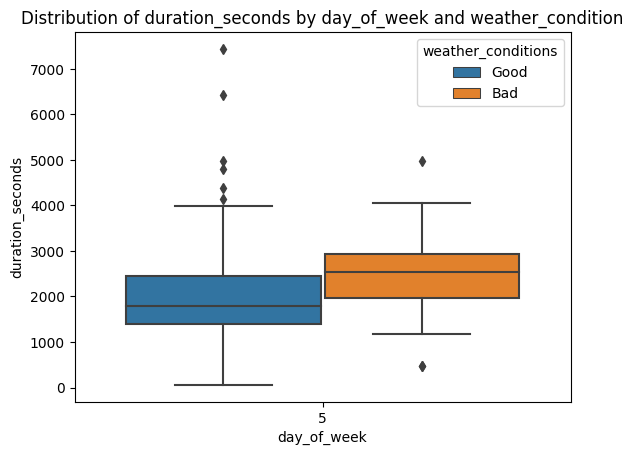

In [26]:
sns.boxplot(x="day_of_week", y="duration_seconds", hue="weather_conditions", data=df_dropoff)
plt.title("Répartition de la durée_secondes par day_of_week et Weather_condition")
plt.show()

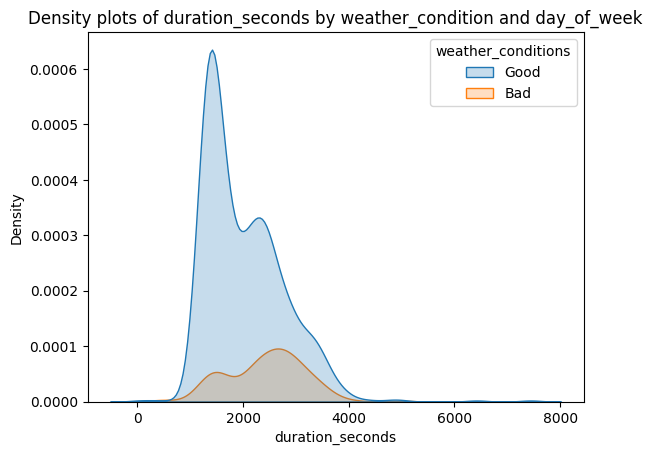

In [27]:
sns.kdeplot(x="duration_seconds", hue="weather_conditions", data=df_dropoff, fill=True)
plt.title("Graphiques de densité de durée_secondes par condition_climatique et jour_de_semaine")
plt.show()

In [28]:
from scipy.stats import mannwhitneyu

# Effectuer le test non paramétrique
u_stat, p_val = mannwhitneyu(rainy_saturdays, other_days)

# Formater la sortie
print(f"Mann-Whitney U statistic: {u_stat:.2f}")
print(f"p-value: {p_val:.4f}")

Mann-Whitney U statistic: 107113.50
p-value: 0.0000


#### Comment vous avez formé les hypothèses nulles et alternatives? Quel critère avez-vous utilisé pour tester les hypothèses et pourquoi? Comment mon projet sera-t-il évalué ?

Commentaire : Ici, le défi était de reclasser les données et d'en assurer la lisibilité. Ainsi, la date devait être convertie en jour de la semaine, puis en index pour le jour, puis une certaine séparation pour la condition météo, j'ai donc utilisé une valeur booléenne pour le bien ou le mal. J'ai ensuite exécuté le test t et obtenu une valeur p de 0,0, ce qui était louche, j'ai donc décidé de visualiser les données. Le boxplot n'a montré aucune différence réelle, puis j'ai appliqué un test statistique non paramétrique, car je me souvenais que les données du graphique précédent étaient faussées. Le résultat était également une valeur p de 0,0.
    
Aperçu : La durée des voyages les samedis pluvieux de novembre est très différente de celle des autres jours du même mois.

## Step 6: Conclusion générale

Cette mission a été utile et stimulante. J'ai eu de gros problèmes avec le bokeh et je n'ai toujours pas pu le déployer sur Render. Je devrai surmonter cet obstacle à l’avenir. J'aime travailler avec de nouvelles visualisations car elles sont plus perspicaces. Les tests statistiques sont très utiles pour renforcer ma sélection de tests et l'interprétation des résultats.

Les enseignements tirés des courses en taxi à Chicago en novembre 2017 ont été difficiles et disparates, mais nous avons identifié les principales entreprises, les quartiers les plus populaires, quantifié le nombre de courses, la durée et l'heure de début, puis segmenté en fonction de la variable météo.